In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy  as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
#Import Seaborn for data visualization
import seaborn as sns
import scipy.stats as stats

#Load ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
datafile='df_modeling.csv'
df = pd.read_csv(datafile)

In [4]:
#This is to check if the DiabetesMeds feature contains if they are on a diabetic medication.
count = 0

# list of columns to check for 1 values
cols_to_check = ['metformin', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'insulin',
                 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','repaglinide']

# loop through rows and check for 1 values in specified columns
for i in range(len(df)):
    if (df[cols_to_check].iloc[i] == 1).any() and df['diabetesMed'][i] == 0:
        count += 1

print(count)

0


In [3]:
#Drop Drug columns as they do not add any predictive value.  This information is contained in the 'DiabetesMeds' Feature.
df = df.drop(columns=['metformin', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'insulin',
                 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','repaglinide']
)


In [4]:
df = df.reset_index(drop=True)


In [5]:
#Define the y variable as the discharge_disposition_id. 1=Expired,0=Non-expired
y = df['discharge_disposition_id']
X = df.drop('discharge_disposition_id', axis=1)

In [8]:
sm = SMOTE(random_state = 42)
X_resampled, y_train_resampled = sm.fit_resample(X, y)

In [30]:
print(X_resampled.shape, y_train_resampled.shape)

(198690, 2266) (198690,)


In [9]:
#Create a 70/30 train and test split for Logistic Regression.
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_train_resampled, test_size=0.3, random_state=42, shuffle=True)

In [10]:
# Making a Scaler object
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Using a range of max iteration values of 100, 500 ,100, apply the Logistic Regression classifier to classify the the data.

#test_scores = []
train_scores = []
max_iter =  [100, 500, 1000]
for i in max_iter:

    logreg= LogisticRegression(random_state = 42, max_iter=i)
    logreg.fit(X_train_scaled, y_train)
    
    train_scores.append(logreg.score(X_train,y_train))
    #test_scores.append(logreg.score(X_test_scaled, y_test))

#Print the train and test scores for each iteration.
    #print('Test Scores:',test_scores)
    print('Train Scores:',train_scores)


/Users/sachinsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Scores: [0.49859436451615224]
Train Scores: [0.49859436451615224, 0.49859436451615224]
Train Scores: [0.49859436451615224, 0.49859436451615224, 0.49859436451615224]


In [20]:
#Identify the number of max_iter that resulted in the max score in the training dataset.
print('Max Train score Value:',max(train_scores))

Max Train score Value: 0.49859436451615224


In [21]:
#Identify the number of neighbors that resulted in the max score in the testing dataset.

ax_train = max(train_scores)
indext = train_scores.index(max_train)
print('Max iterations for train =',max_iter[indext])

Max iterations for train = 100


In [14]:
logreg= LogisticRegression(random_state = 42, max_iter=100)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [16]:
# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[29453   154]
 [  679 29321]]


Model shows that it does well with high PPV for both classes.

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     29607
           1       0.99      0.98      0.99     30000

    accuracy                           0.99     59607
   macro avg       0.99      0.99      0.99     59607
weighted avg       0.99      0.99      0.99     59607



<AxesSubplot:>

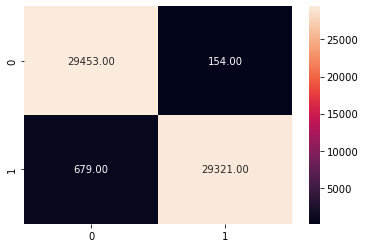

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".2F")

Model has high positive predictive value for identifying both expired and non-expired patients.

In [23]:
#Using Random Forest to determine hyperparameter tuning for n_estimators
train_scores = []
n_estimators =  [100, 500, 1000]
for i in n_estimators:

    forest = RandomForestClassifier(n_estimators = i, random_state=42)
    forest.fit(X_train, y_train)
    
    train_scores.append(forest.score(X_train,y_train))
    print('Train Scores:',train_scores)

Train Scores: [1.0]
Train Scores: [1.0, 1.0]
Train Scores: [1.0, 1.0, 1.0]


In terms of performance and for estimating high accuracy n_estimators = 100 is the optimal solution. 

In [24]:
forest = RandomForestClassifier(n_estimators = 100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions on the test data and evaluate the model
predictions = forest.predict(X_test)
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9801365611421478


In [26]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

[[29009   598]
 [  586 29414]]


Good specificity for both predictions. 

<AxesSubplot:>

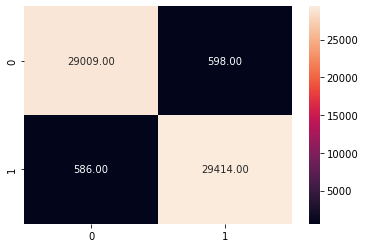

In [27]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt=".2F")

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29607
           1       0.98      0.98      0.98     30000

    accuracy                           0.98     59607
   macro avg       0.98      0.98      0.98     59607
weighted avg       0.98      0.98      0.98     59607



Model does  perform well at identifying which patients are likely to die.  Good precison and recall scores.

30


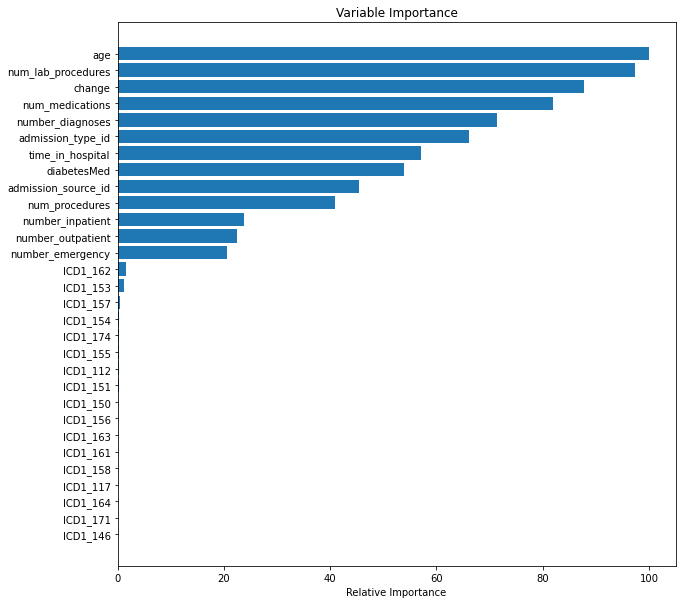

In [29]:
feature_importance = forest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

What is impressive is that the model was able to identify the codes that do have a high mortality rate.  
ICD 162-> Lung Ca
153 -> Colon Ca
157 -> Pancreatic Ca
174 -> Breast Ca
154 -> Rectal Ca
155 -> Liver Ca
112 -> Candida Infection. (common comorbity associated with cancer)
151 -> Stomach Ca
150 -> Esophageal Ca
156 -> Gallbladder Ca
163 -> Cancer of the pleura. (mesothelioma)
161 -> Laryngeal Ca
117 -> Fungal Infection.  (common comorbity associated with cancer)
164 -> Thymus Cancer
158 -> Retroperitoneum Ca
146 -> Oropharynx Ca
171 -> Soft Tissue Ca

In [159]:
#make an array representing 1 patient with 2,266 features.
my_patient = np.zeros((1, 2266))

In [32]:
columns_list = list(X_resampled.columns)

In [123]:
#list of features
for i in range(0, 30, 8):
    print(',',columns_list[i:i+8])

, ['age', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient']
, ['number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed', 'ICD1_112', 'ICD1_117', 'ICD1_146']
, ['ICD1_150', 'ICD1_151', 'ICD1_153', 'ICD1_154', 'ICD1_155', 'ICD1_156', 'ICD1_157', 'ICD1_158']
, ['ICD1_161', 'ICD1_162', 'ICD1_163', 'ICD1_164', 'ICD1_171', 'ICD1_174', 'ICD1_182', 'ICD1_183']


In [160]:
#Manipulating values in the array to reflect different features in the new test patient. 
my_patient[0,0] = 99  # age
my_patient[0,1] = 1   # admission_type_id
my_patient[0,2] = 7   # admission_source_id
my_patient[0,3] = 15   # time_in_hospital
my_patient[0,4] = 10  # num_lab_procedures
my_patient[0,5] = 6   # num_procedures
my_patient[0,6] = 8  # num_medications
my_patient[0,7] = 3   # number_outpatient
my_patient[0,8] = 3   # number_emergency
my_patient[0,9] = 3   # number_inpatient
my_patient[0,10] = 10 # number_diagnoses
my_patient[0,11] = 0  # change
my_patient[0,12] = 0  # diabetesMed
my_patient[0,29] = 1  # Pancreatic Cancer
my_patient[0,25] = 1  # Lung Cancer
my_patient[0,22] = 1  # Colon Cancer


In [166]:
#print(columns_list[22])

In [164]:
#Print first 30 features of the patient in the array.
my_patient_int = my_patient.astype(np.int64)
print(my_patient_int[0,:30])

[99  1  7 15 10  6  8  3  3  3 10  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  1  0  0  0  1]


In [165]:
patient_predictionRF = forest.predict_proba(my_patient)
patient_predictionLR = logreg.predict_proba(arr_scaled)
print("The Random Forrest probability of death for this patient is {:.2%}".format(new_patient[0][1]))
print("The Random Forrest probability of survival for this patient is {:.2%}".format(new_patient[0][0]))

print("The Logistic Regression probability of death for this patient is {:.2%}".format(new_patient1[0][1]))
print("The Logistic Regression probability of survival for this patient is {:.2%}".format(new_patient1[0][0]))


The Random Forrest probability of death for this patient is 22.00%
The Random Forrest probability of survival for this patient is 78.00%
The Logistic Regression probability of death for this patient is 100.00%
The Logistic Regression probability of survival for this patient is 0.00%


This fictious patient is 99 years old, admitted from the ER, has been in the hospital for 15 days.  Has had 10 lab draws done, has had 6 procedures done, is on 8 medications and has had 3 previous hospitalizations, 3 previous ER visits, 3 outpatient vists.  Patient has a past medical history of 10 different diseases which include Lung Cancer, Pancreatic Cancer, AND Colon Cancer.  This very sick patient has 0% survival from the logistic regression model and a 78% survival from the Random Forrest.  I would have expected that the chance of survival would be low for both models.  